In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
from vertex import BiomeCollection

collection = BiomeCollection.load()

results = collection.evaluate()

Generating base vector fields
100%|██████████| 2/2 [00:00<00:00,  2.15it/s]
Evaluating all rules
  0%|          | 0/6 [00:00<?, ?it/s][[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
100%|██████████| 6/6 [00:00<00:00, 4183.15it/s]
Generate weighted result maps
100%|██████████| 1/1 [00:00<00:00, 692.13it/s]


1000.0 -10.0 525.2136081977525


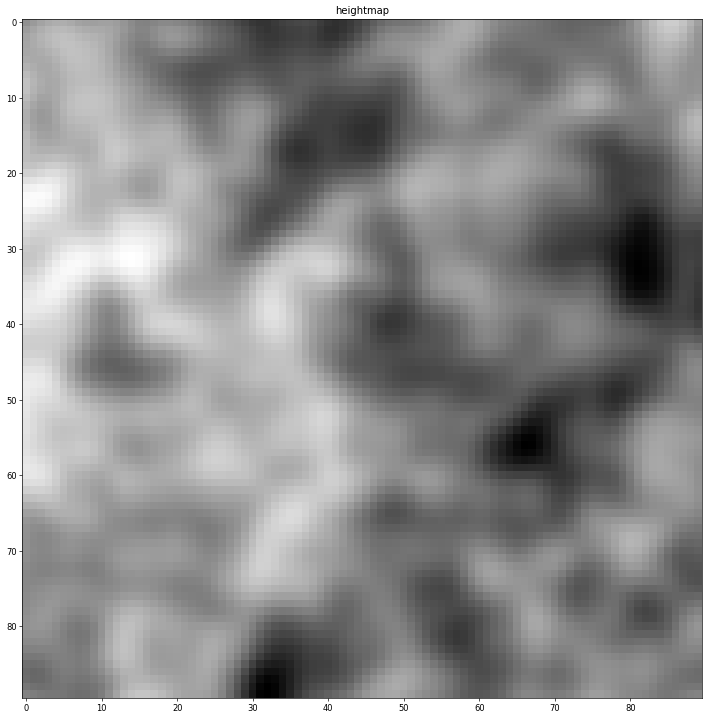

90.0 0.0 45.0


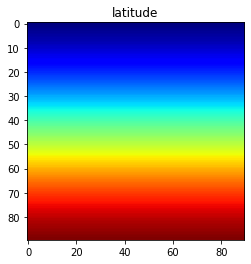

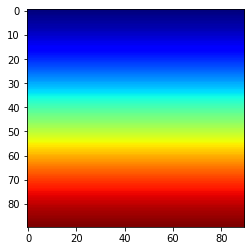

In [4]:
import matplotlib.pyplot as plt

result = collection._vector_fields['heightmap_m']
fig = plt.figure(
    figsize=(15, 15), dpi=60, facecolor='w', edgecolor='k'
)
print(result.max(), result.min(), result.mean())
plt.title(str('heightmap'))
plt.imshow(
    result,
    cmap='gray',
    norm=None,
    interpolation=None,
    vmin=0,
    vmax=1000
)
plt.show()

result = collection._vector_fields['latitude']
print(result.max(), result.min(), result.mean())
plt.title(str('latitude'))
plt.imshow(
    result,
    cmap='jet',
    norm=None,
    interpolation=None,
)
plt.show()
plt.imshow(
    abs(result),
    cmap='jet',
    norm=None,
    interpolation=None,
)
plt.show()


0.0 0.0 0.0


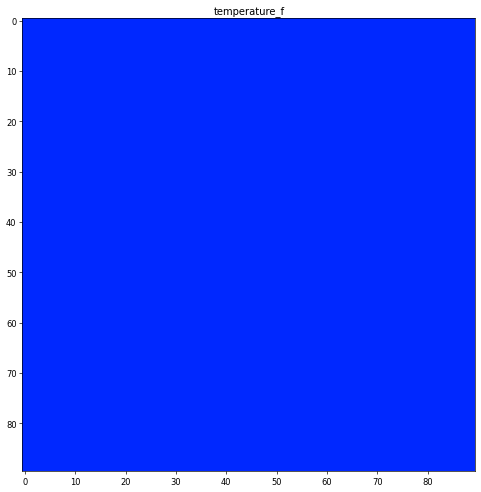

In [5]:
import matplotlib.pyplot as plt

for key, result in results.items():
    fig = plt.figure(
        figsize=(10, 10), 
        dpi=60, facecolor='w', edgecolor='k'
    )
    print(result.max(), result.min(), result.mean())
    plt.title(str(key))
    plt.imshow(
        result,
        cmap='jet',
        interpolation=None,
        vmin=-30,
        vmax=150
    )
    plt.show()
#     plt.subplot(132)
#     plt.imshow(result['mask'],
#                cmap='gray',
#                norm=None,
#                interpolation=None,vmin=0, vmax=1)
#     plt.subplot(133)
#     plt.imshow(result['field'])
#     pic = result['field']
#     print(pic.max(), pic.min(), pic.mean())
#     plt.show()
